# Medical cost prediction

In [11]:
#importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

####Data preprocesing,Analyzing and Cleaning

In [12]:
#loading the data
df = pd.read_csv('/content/Medical cost.csv')

In [13]:
#checking the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
#total no.s of columns and rows
df.shape

(1338, 7)

In [15]:
#checking the datatype of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
#checking for null columns
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


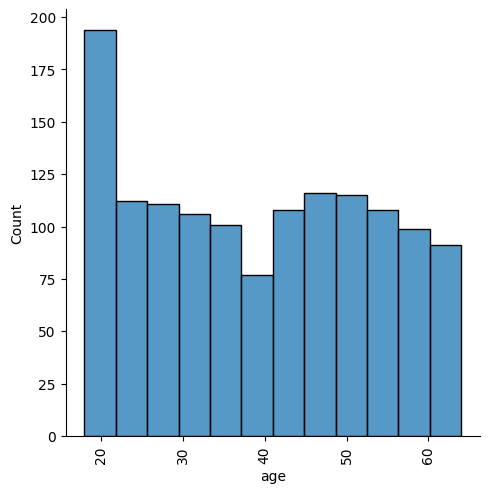

In [17]:
#analyzing the column age
sns.displot(x=df['age'])
plt.xticks(rotation='vertical')
plt.show()

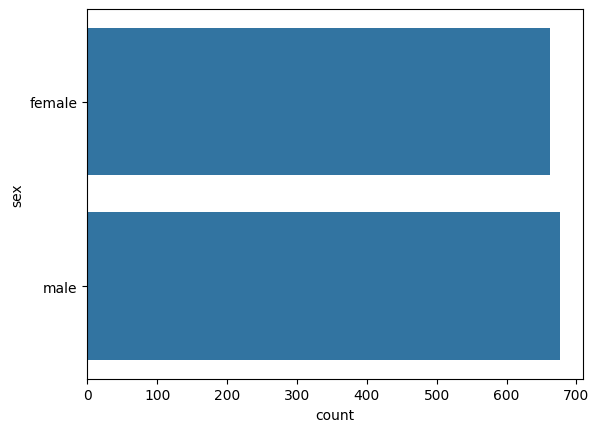

In [18]:
# similarily plotting a counts graph for gender
sns.countplot(df['sex'])
plt.show()

In [19]:
#we observe equal distribution of gender
df.value_counts('sex')

,count
sex,
male,676
female,662


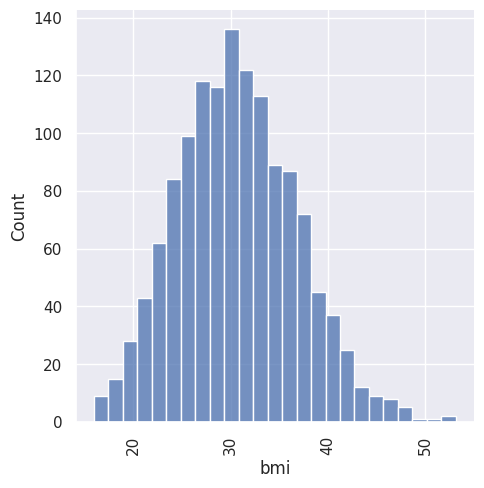

In [20]:
#analyzing the column bmi
sns.set()
sns.displot(x=df['bmi'])
plt.xticks(rotation='vertical')
plt.show()

In [21]:
#analyzing children column
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [22]:
#analyzing smoker column
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [23]:
#analyzing region column
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


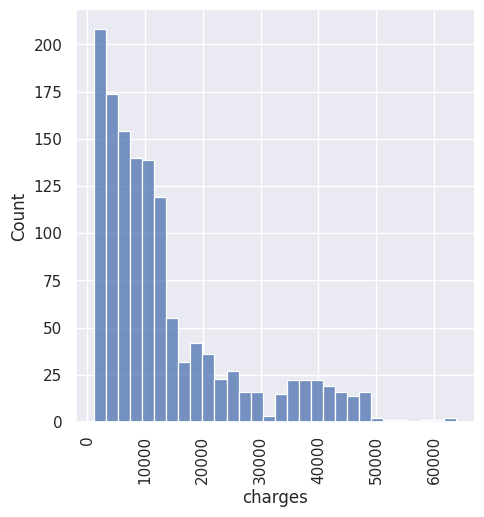

In [24]:
#analyzing charges column
sns.displot(df['charges'])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
#changing some obj to num datatypes(int,float)
df.replace({'sex':{'male':1,'female':0}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.replace({'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}},inplace=True)

<ipython-input-25-7a95a71fc34b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':1,'female':0}},inplace=True)
<ipython-input-25-7a95a71fc34b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
<ipython-input-25-7a95a71fc34b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_o

In [26]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
595,46,0,33.725,1,0,3,8823.98575
240,23,0,36.670,2,1,3,38511.62830
341,62,1,30.020,0,0,4,13352.09980
490,19,0,32.900,0,0,2,1748.77400
713,20,1,40.470,0,0,3,1984.45330


## Model Building

In [ ]:
#spliting the features and target
X = df.drop(columns='charges',axis=1)
Y = df['charges']


In [28]:
#importing dependencies
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

## Linear Regression Model

In [29]:
#train data,test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
#model ->
regex=LinearRegression()


In [30]:
#trained data ->
regex.fit(X_train,Y_train)
prediction = regex.predict(X_train)

In [31]:
#root square matrix->
r2train=metrics.r2_score(Y_train,prediction)
print('R square value :',r2train)

R square value : 0.751505643411174


In [ ]:
import pickle

# Save the model to a file -->
filename = 'medical_cost_prediction_model.pkl'
pickle.dump(regex, open(filename, 'wb')) 

In [35]:
# Load the model from the file:
with open('medical_cost_prediction_model.pkl', 'rb') as file:
       loadmodel = pickle.load(file)

In [39]:
prediction = loadmodel.predict(X_test)
prediction

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      